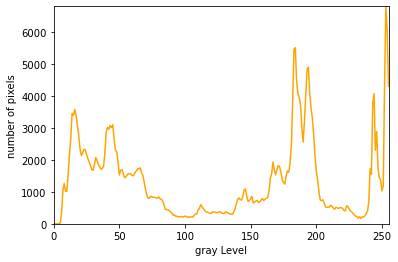

In [5]:
"""灰度直方图"""
 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import myutils as my
import imutils as im
from imutils import perspective

#定义caleGrayHist函数来计算灰度直方图
def caleGrayHist(image):
    #灰度图像的高、宽
    rows, cols = image.shape
    #存储灰度直方图
    grayHist = np.zeros([256], np.uint64) #图像的灰度级范围是0~255      
    for r in range(rows):
        for c in range(cols):
            
            grayHist[image[r][c]] +=1
            
    return grayHist

img = cv2.imread('11806.jpg', cv2.IMREAD_GRAYSCALE)
img_copy = img.copy()
imag = im.resize(img_copy, height=500)

img_color = cv2.imread('11806.jpg')
ratio = img_color.shape[0] / 500.0
orig = img_color.copy()
img_color = im.resize(img_color, height=500)

#计算灰度直方图
grayHist = caleGrayHist(imag)
#画出直方图
x_range = range(256)
plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='orange')
#设置坐标轴的范围
y_maxValue = np.max(grayHist)
plt.axis([0, 255, 0, y_maxValue]) #画图范围
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.show()


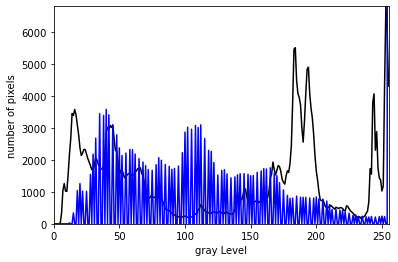

In [7]:


#线性变换
a = 2.5
O = float(a) * imag
O[O>255] = 255 #大于255要截断为255

#数据类型的转换
O = np.round(O)
O = O.astype(np.uint8)

'''
i = 0
for x in range(500):
    for y in range(666):
        if 90 < O[x,y] < 120:
            i = i + 1
print(i)
'''

#计算灰度直方图
grayHist = cv2.calcHist([imag], [0], None, [256], [0, 256])
grayHist1 = cv2.calcHist([O], [0], None, [256], [0, 256])
#画出直方图
x_range = range(256)
plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='black')
plt.plot(x_range, grayHist1, 'r', linewidth=1.5, c='b')
#设置坐标轴的范围
y_maxValue = np.max(grayHist)
plt.axis([0, 255, 0, y_maxValue]) #画图范围
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.show()


In [8]:


'''第一部分：预处理'''
my.cv_show('origi', imag)
my.cv_show('O', O)



In [9]:
blur = cv2.GaussianBlur(O, (5, 5), 0)
edged = cv2.Canny(blur, 75, 200)
my.cv_show('edged', edged)



In [10]:
contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
print(len(contours))
img_color_copy = img_color.copy()
cv2.drawContours(img_color_copy, contours, -1, (0, 0, 255), 2)
my.cv_show('contours', img_color_copy)
print(len(contours))


78
78


: 

In [5]:
locs = []
cnts = []
# 遍历每个轮廓，根据面积找出数字界面
for (i, c) in enumerate(contours):
    # 计算矩形
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    img_color_copy2 = img_color.copy()
    if  area > 1000 and 0.5< h/w <1.5:
        print(f'w={w}, h={h}')
        print(area)
        locs.append((x, y, w, h))
        cnts.append(c)

print(len(locs))
print(f'aruco左上角坐标为{locs[0][0]},{locs[0][1]}')
    
roi = img_color[locs[0][1]:locs[0][1] + locs[0][3],
          locs[0][0]:locs[0][0] + locs[0][2]]
my.cv_show('roi', roi)



w=147, h=127
16364.5
1
aruco左上角坐标为5,171


In [6]:
for c in cnts:
        # 计算轮廓近似
        peri = cv2.arcLength(c, True)
        # c表示输入的点集，epsilon表示从原始轮廓到近似轮廓的最大距离，它是一个准确度参数
        approx = cv2.approxPolyDP(c, 0.02*peri, True)
 
        # 4个点的时候就拿出来
        if len(approx) == 4:
            screenCnt = approx
            break
print(approx)
cv2.destroyAllWindows()


[[[  5 171]]

 [[ 23 296]]

 [[151 297]]

 [[142 176]]]
